Training samples: 2451, Testing samples: 613
Image shape: (150, 150, 3)
Class weights: {0: 0.7160385626643295, 1: 1.4434628975265018, 2: 1.0981182795698925}


c:\Users\sayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - accuracy: 0.4739 - loss: 1.0758 - val_accuracy: 0.6558 - val_loss: 0.8209
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.6865 - loss: 0.7581 - val_accuracy: 0.6819 - val_loss: 0.6863
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - accuracy: 0.7528 - loss: 0.5808 - val_accuracy: 0.8026 - val_loss: 0.4711
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 303ms/step - accuracy: 0.8234 - loss: 0.4508 - val_accuracy: 0.8548 - val_loss: 0.3502
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 288ms/step - accuracy: 0.8724 - loss: 0.2930 - val_accuracy: 0.8760 - val_loss: 0.3027
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - accuracy: 0.8981 - loss: 0.2342 - val_accuracy: 0.8597 - val_loss: 0.3430
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 293ms/step - accuracy: 0.9117 - loss: 0.2038 - val_accuracy: 0.8809 - val_loss: 0.3294
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.9384 - loss: 0.1608 - val_accu

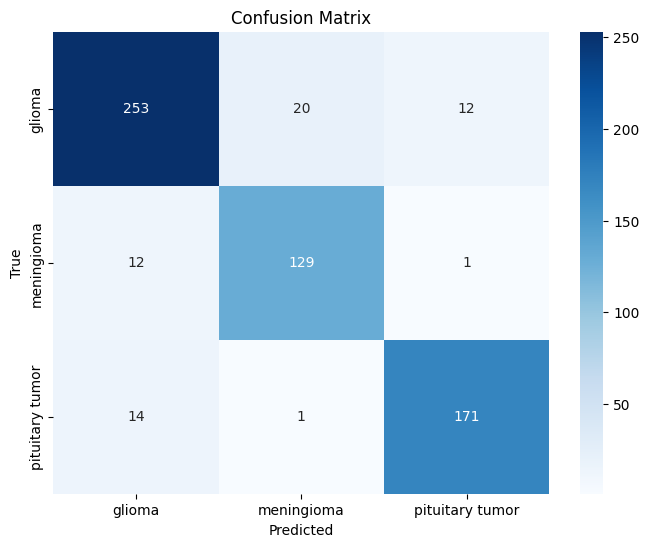

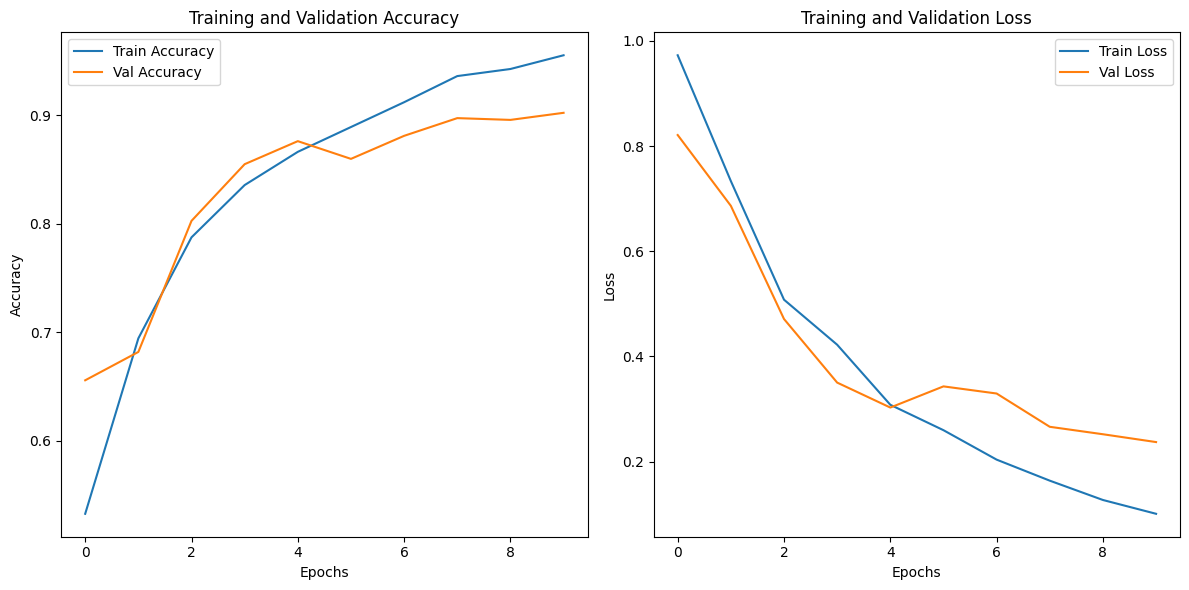

Model saved to C:\Users\sayed\Desktop\Athar_R01\model\brain_tumor_model.h5


In [1]:
# Author: Athar Sayed
# Date: 22/04/2025
# Task 1 : CNN IMAGE CLASSIFICATION ON BRAIN TUMOUR

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.utils import class_weight  # For calculating class weights
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Step 1: Define Parameters
base_dir = r"C:\Users\sayed\Desktop\LTICNN\data\Collective_data\new\new\Contrast_Stretching"
labels_dict = {"glioma": 0, "meningioma": 1, "pituitary tumor": 2}  # Labels dictionary for tumor types
img_size = 150  # Resize all images to 150x150 pixels

# Directories for each class (glioma, meningioma, and pituitary tumor)
glioma_dir = os.path.join(base_dir, 'glioma')
meningioma_dir = os.path.join(base_dir, 'meningioma')
pituitary_tumor_dir = os.path.join(base_dir, 'pituitary tumor')

# Step 2: Load and Preprocess Images
X = []  # List to store image data
Y = []  # List to store corresponding labels

# Function to process images from each directory
def load_images_from_directory(directory, label):
    for img_file in os.listdir(directory):
        img_path = os.path.join(directory, img_file)
        try:
            img = cv2.imread(img_path)  # Read the image using OpenCV
            img = cv2.resize(img, (img_size, img_size))  # Resize the image to uniform size (150x150)
            X.append(img)  # Append image to X
            Y.append(label)  # Append corresponding label to Y
        except Exception as e:
            print(f"Could not load image {img_path}: {e}")

# Load images for each class
load_images_from_directory(glioma_dir, labels_dict["glioma"])
load_images_from_directory(meningioma_dir, labels_dict["meningioma"])
load_images_from_directory(pituitary_tumor_dir, labels_dict["pituitary tumor"])

# Convert to numpy arrays and normalize pixel values
X = np.array(X) / 255.0  # Normalize pixel values to [0, 1]
Y = to_categorical(np.array(Y), num_classes=3)  # One-hot encode labels for the 3 classes (glioma, meningioma, pituitary tumor)

# Step 3: Data Augmentation (for better generalization of the model)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images within a range of 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of height
    shear_range=0.2,  # Apply shearing transformations
    zoom_range=0.2,  # Randomly zoom into images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in new pixels after transformation using the nearest value
)

# Fit the generator to the data
datagen.fit(X)

# Step 4: Split Data into Training, Validation, and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]}")

# Step 5: Calculate Class Weights (to handle class imbalance)
class_weights = class_weight.compute_class_weight(
    'balanced', 
    classes=np.unique(np.argmax(Y_train, axis=1)),  # Classes are the integer labels (not one-hot)
    y=np.argmax(Y_train, axis=1)  # Convert Y_train to integer labels
)

# Convert to dictionary format
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

# Step 6: Build the CNN Model
model = Sequential()

# First convolutional layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters for deeper feature extraction
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D feature vector
model.add(Flatten())

# Fully connected dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Dropout layer to reduce overfitting (randomly drops 50% of neurons during training)
model.add(Dropout(0.5))

# Output layer with 3 neurons (for 3 classes) and softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Step 7: Train the Model with Class Weights
history = model.fit(
    X_train, Y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, Y_test),
    class_weight=class_weight_dict  # Pass class weights here to handle imbalanced data
)

# Step 8: Evaluate the Model (Accuracy)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: F1 Score Calculation (weighted average to handle class imbalance)
# Predict the classes for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Get the predicted class labels
Y_true = np.argmax(Y_test, axis=1)  # Get the true class labels

# Calculate F1 Score for each class
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')  # Weighted average to account for imbalance
print(f"F1 Score: {f1:.2f}")

# Step 10: Confusion Matrix (printing as numbers)
cm = confusion_matrix(Y_true, Y_pred_classes)

# Print the confusion matrix as raw numbers
print("Confusion Matrix:")
print(cm)


# Visualize Confusion Matrix with Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels_dict.keys(), yticklabels=labels_dict.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 11: Plot Training and Validation Accuracy and Loss
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Step 12: Save the trained model to the specified folder
model_save_path = r"C:\Users\sayed\Desktop\Athar_R01\model\brain_tumor_model.h5"
model.save(model_save_path)  # Save the model to the given path
print(f"Model saved to {model_save_path}")